In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

df = pd.read_csv('../../../data/module4/week2/BTC-Daily.csv')

# Remove duplicate rows
df = df.drop_duplicates()
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


2014-11-28 to 2022-03-01


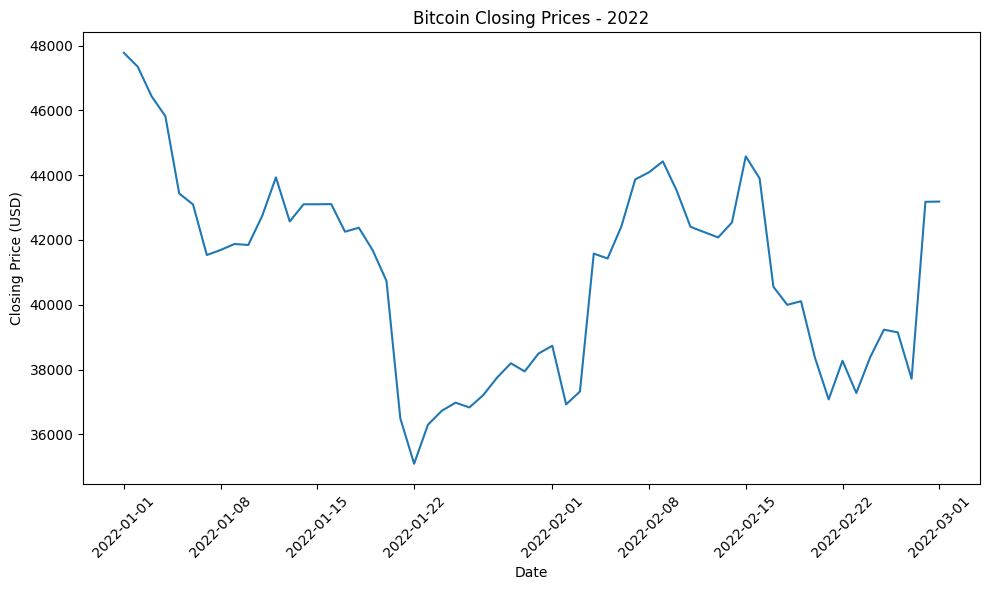

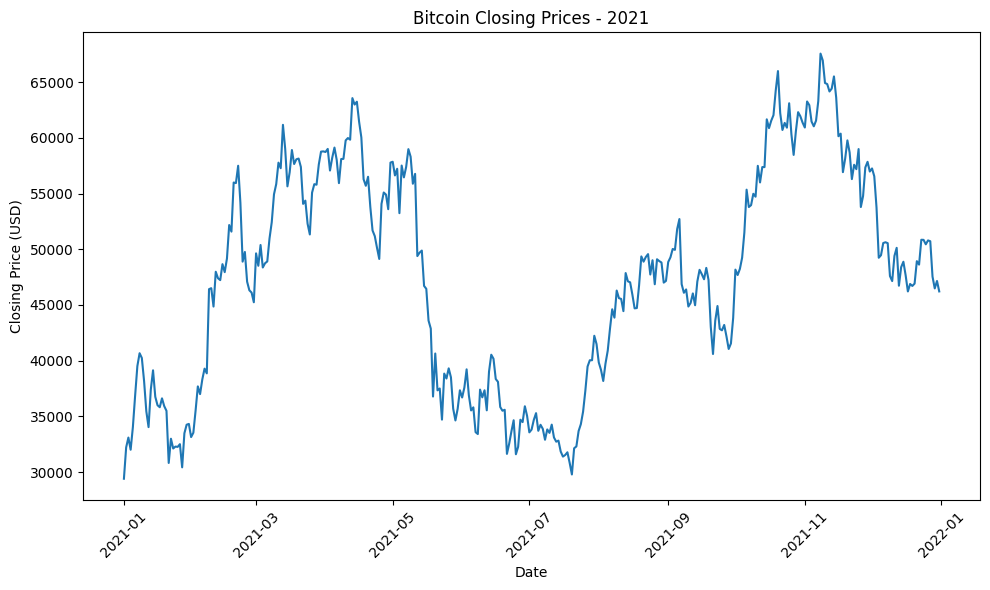

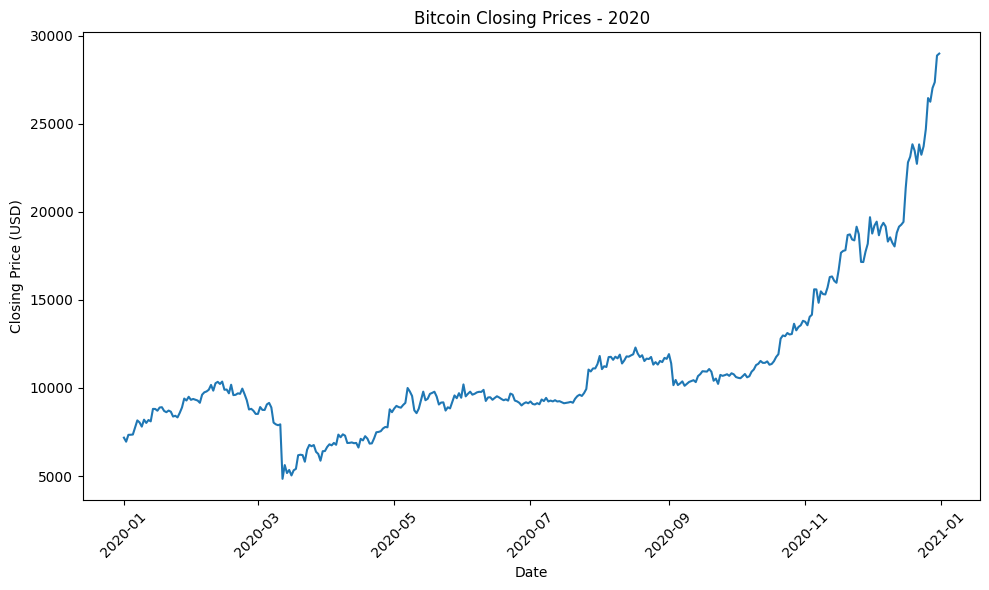

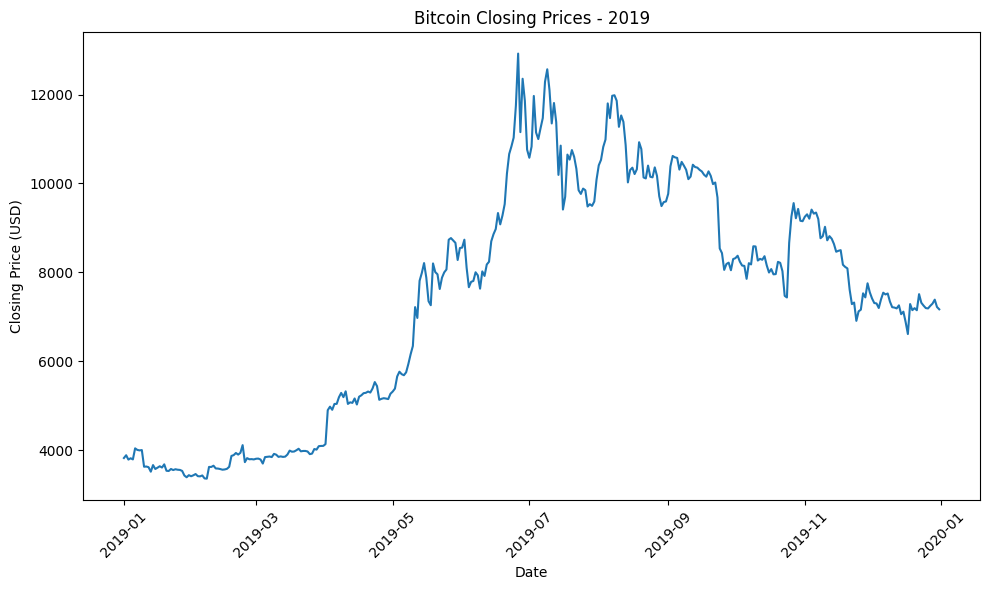

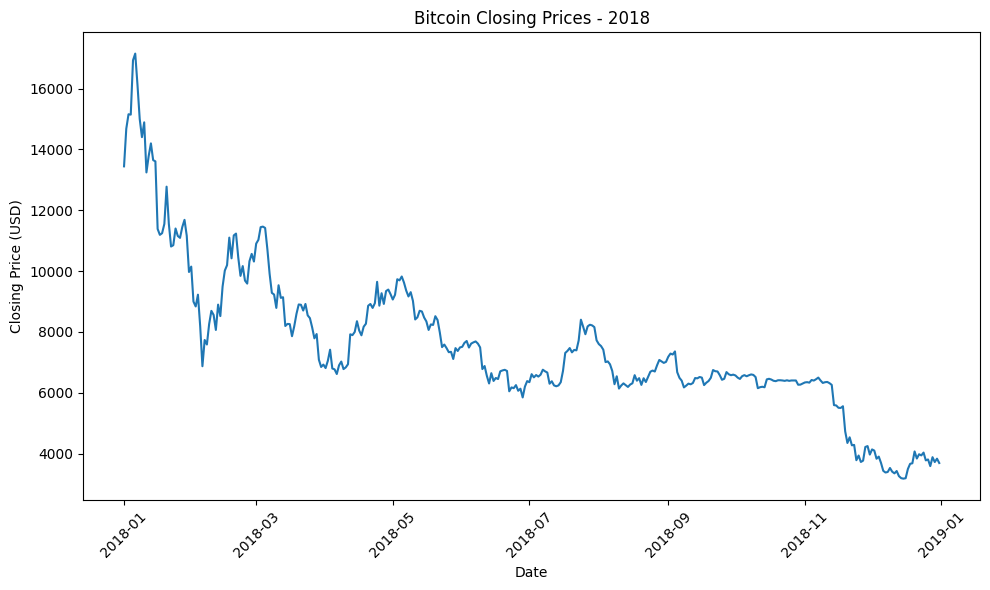

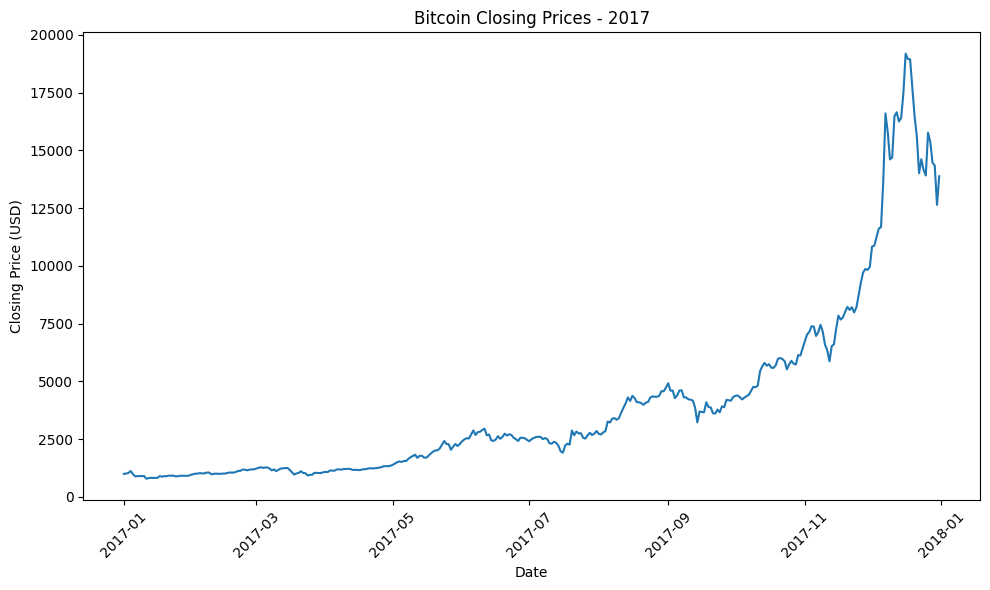

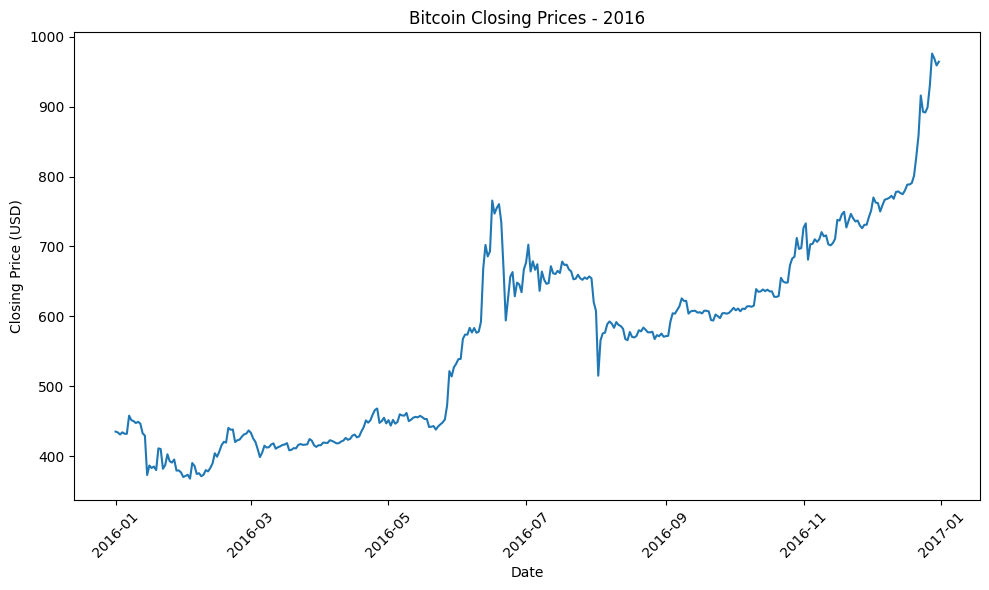

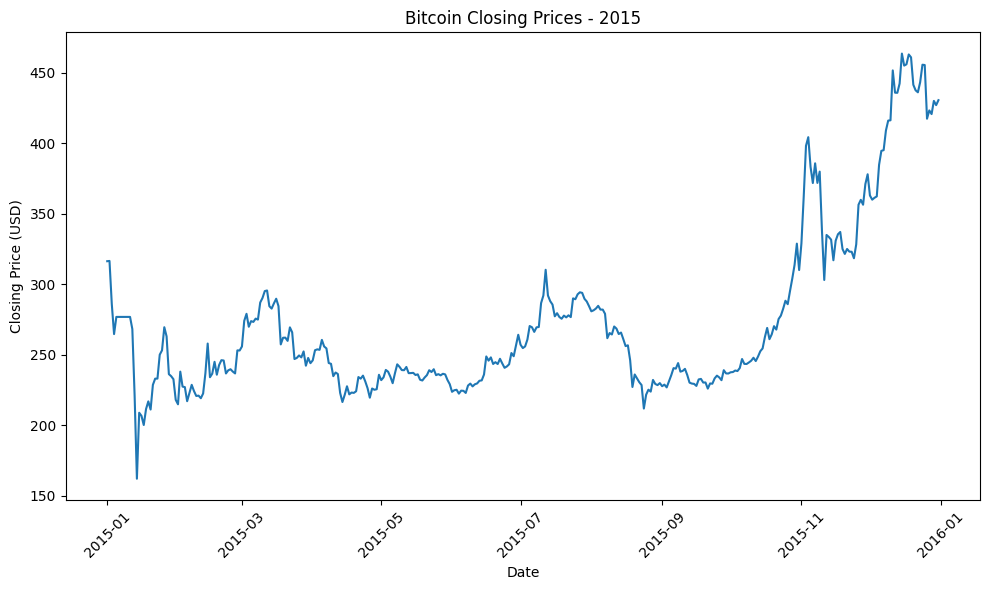

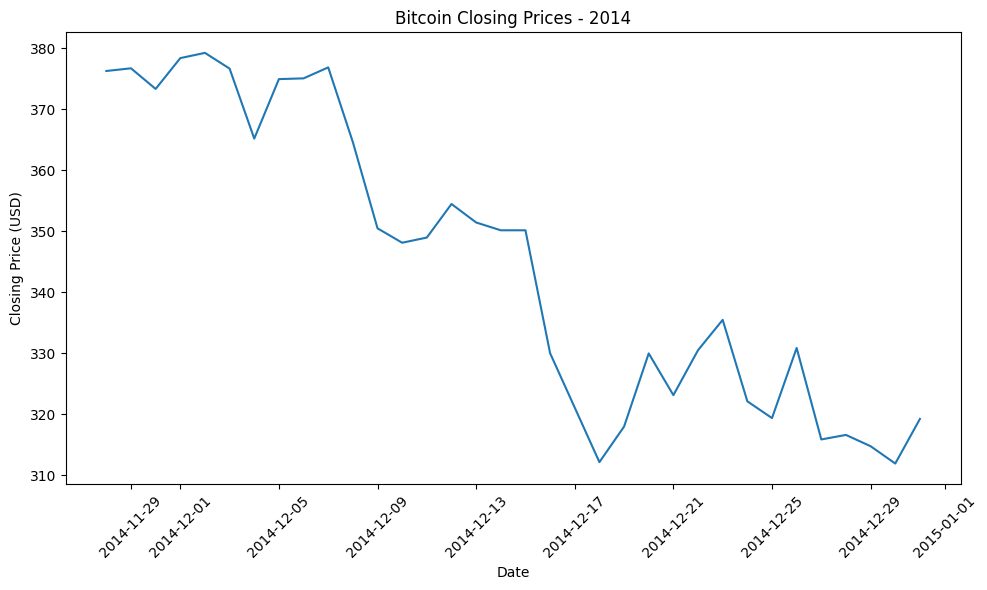

In [2]:
 # Range of dates covered
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max())
print(date_range)
unique_years = df['date'].dt.year.unique()
# ####### Your code here ########
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

for year in unique_years:
	# ####### Your code here ########
	year_month_day = df[df['year'] == year][['year', 'month', 'day', 'date']]
	merged_data = pd.merge(year_month_day, df, on = ['year', 'month', 'day'], how = 'left')
	# Plot
	plt.figure(figsize = (10, 6))
	plt.plot(merged_data['date_x'], merged_data['close'])
	plt.title(f'Bitcoin Closing Prices - {year}')
	plt.xlabel('Date')
	plt.ylabel('Closing Price (USD)')
	plt.xticks(rotation = 45)
	plt.tight_layout()
	plt.show()

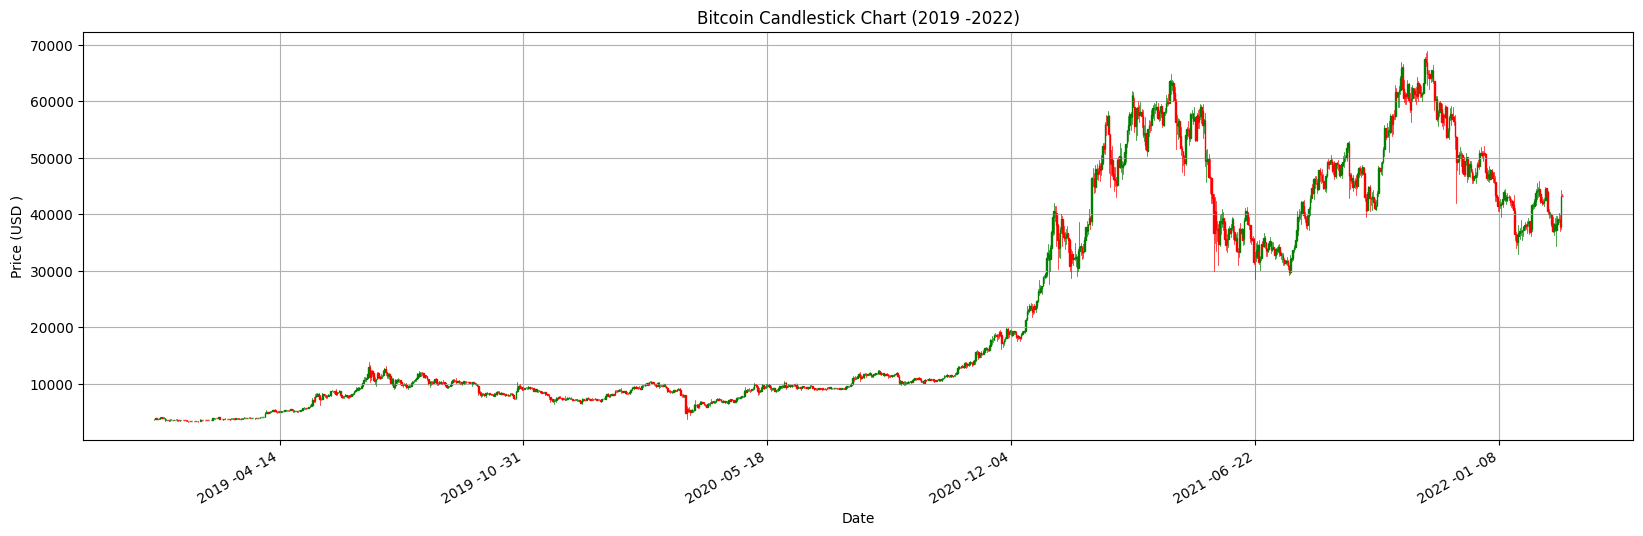

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

# Filter data for 2019 -2022
df_filtered = df[(df['date'] >= '2019-01-01 ') & (df['date'] <= '2022-12-31')]

# Convert date to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize = (20, 6))

candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values,
                 width = 0.6, colorup = 'g', colordown = 'r')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y -%m -%d'))
fig.autofmt_xdate()

plt.title('Bitcoin Candlestick Chart (2019 -2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD )')
plt.grid(True)

# Save the plot as a PDF
plt.savefig(' bitcoin_candlestick_2019_2022.pdf')

plt.show()

## Checking for Null Values in dataset

In [4]:
df.isnull().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
year          0
month         0
day           0
dtype: int64

# Standardizing the prices for Modeling and plotting them

---

In [5]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

df["Standardized_Close_Prices"] = scalar.fit_transform(df["close"].values.reshape(-1, 1))
df["Standardized_Open_Prices"] = scalar.fit_transform(df["open"].values.reshape(-1, 1))
df["Standardized_High_Prices"] = scalar.fit_transform(df["high"].values.reshape(-1, 1))
df["Standardized_Low_Prices"] = scalar.fit_transform(df["low"].values.reshape(-1, 1))

# Part 2: Building Forecasting Models

In [6]:
#Converting Date to numerical form

df['date_str'] = df['date'].dt.strftime('%Y%m%d%H%M%S')

# Convert the string date to a numerical value
df['NumericalDate'] = pd.to_numeric(df['date_str'])

# Drop the intermediate 'date_str' column if not needed
df = df.drop(columns = ['date_str'])

# Linear Regression Model with its Evaluation

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as mae

In [8]:
X = df[["Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = True)

b = 0
w = np.zeros(X_train.shape[1])
lr = 0.01
epochs = 200


In [9]:
def predict(X, w, b):
	return X.dot(w) + b


def gradient(y_hat, y, x):
	loss = y_hat - y
	dw = x.T.dot(loss) / len(y)
	db = np.sum(loss) / len(y)
	cost = np.sum(loss ** 2) / (2 * len(y))
	return (dw, db, cost)


def update_weight(w, b, lr, dw, db):
	w_new = w - lr * dw
	b_new = b - lr * db
	return (w_new, b_new)


def linear_regression_vectorized(X, y, learning_rate = 0.01, num_iterations = 200):
	n_samples, n_features = X.shape
	w = np.zeros(n_features)  # Initialize weights
	b = 0  # Initialize bias
	losses = []

	for _ in range(num_iterations):
		y_hat = predict(X, w, b)  # Make predictions
		dw, db, cost = gradient(y_hat, y, X)  # Calculate gradients
		w, b = update_weight(w, b, learning_rate, dw, db)  # Update weights and bias
		losses.append(cost)

	return w, b, losses


### Training batch

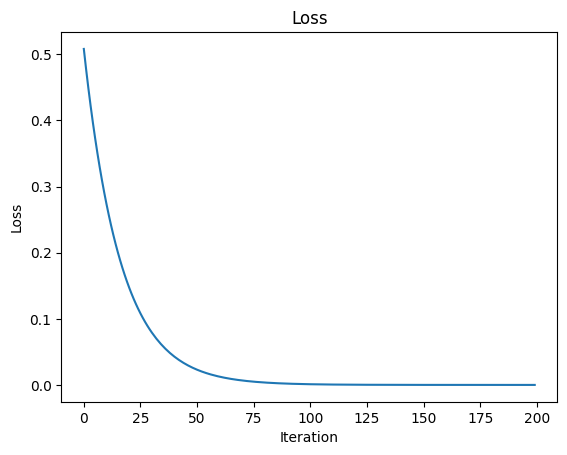

In [10]:
w, b, losses = linear_regression_vectorized(X_train.values, y_train.values, learning_rate = 0.01, num_iterations = 200)

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()

In [11]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = predict(X_test, w, b)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate R-squared on training data
y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

# Calculate R-squared on testing data
test_accuracy = r2_score(y_test, y_pred)

print("Root Mean Square Error (RMSE):", round(rmse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Training Accuracy (R-squared):", round(train_accuracy, 4))
print("Testing Accuracy (R-squared):", round(test_accuracy, 4))

Root Mean Square Error (RMSE): 0.0293
Mean Absolute Error (MAE): 0.0138
Training Accuracy (R-squared): 0.9989
Testing Accuracy (R-squared): 0.9991


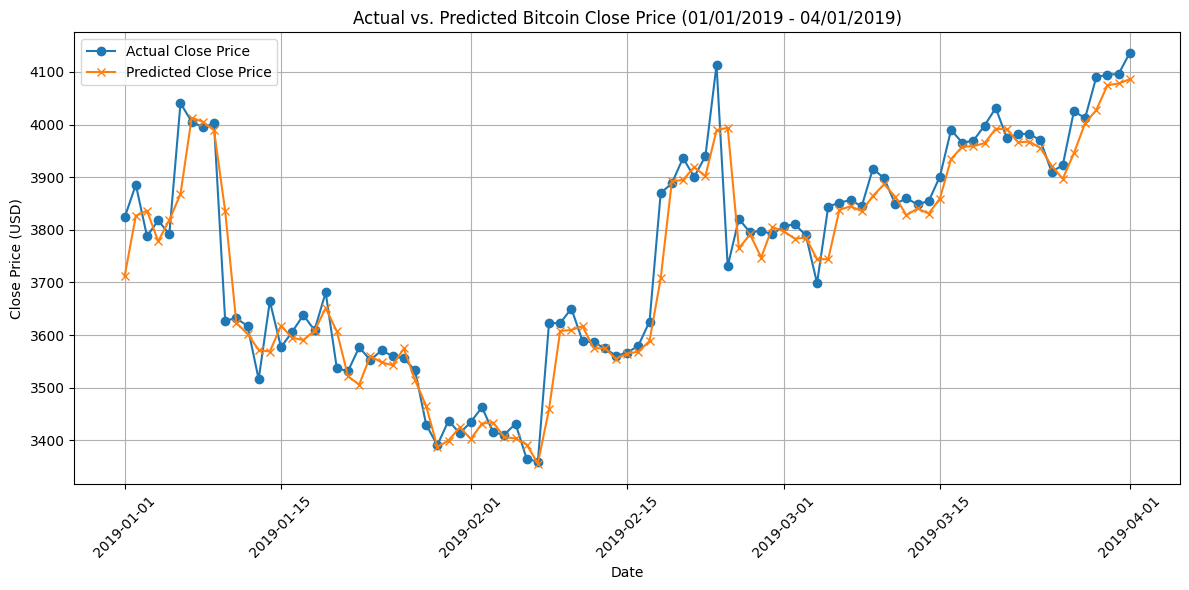

In [12]:
# Filter data for 2019-01-01 to 2019-04-01
df_2019_Q1 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-04-01')]

# Prepare X and y for prediction
X_2019_Q1 = df_2019_Q1[["open", "high", "low"]]
y_2019_Q1_actual = df_2019_Q1["close"]

# Predict using the trained model
y_2019_Q1_pred = predict(X_2019_Q1, w, b)

# Create the plot
plt.figure(figsize = (12, 6))
plt.plot(df_2019_Q1['date'], y_2019_Q1_actual, label = 'Actual Close Price', marker = 'o')
plt.plot(df_2019_Q1['date'], y_2019_Q1_pred, label = 'Predicted Close Price', marker = 'x')
plt.title('Actual vs. Predicted Bitcoin Close Price (01/01/2019 - 04/01/2019)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


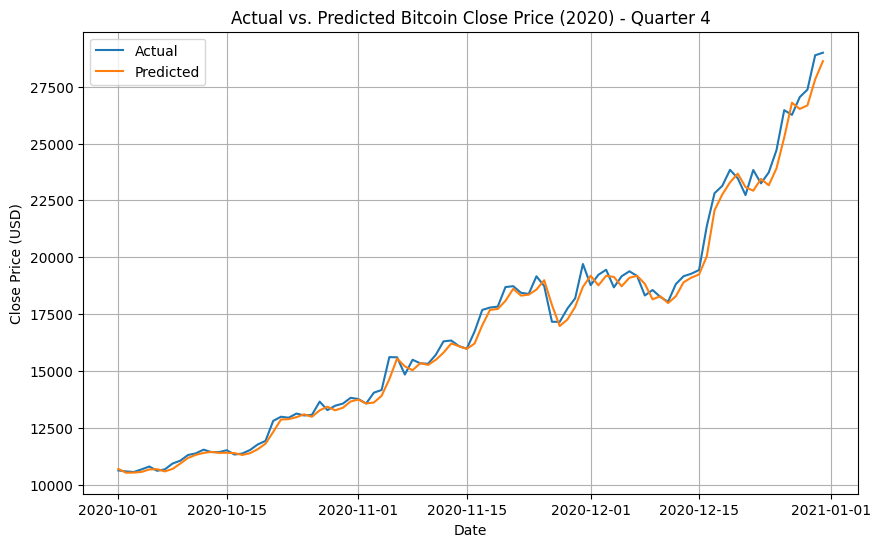

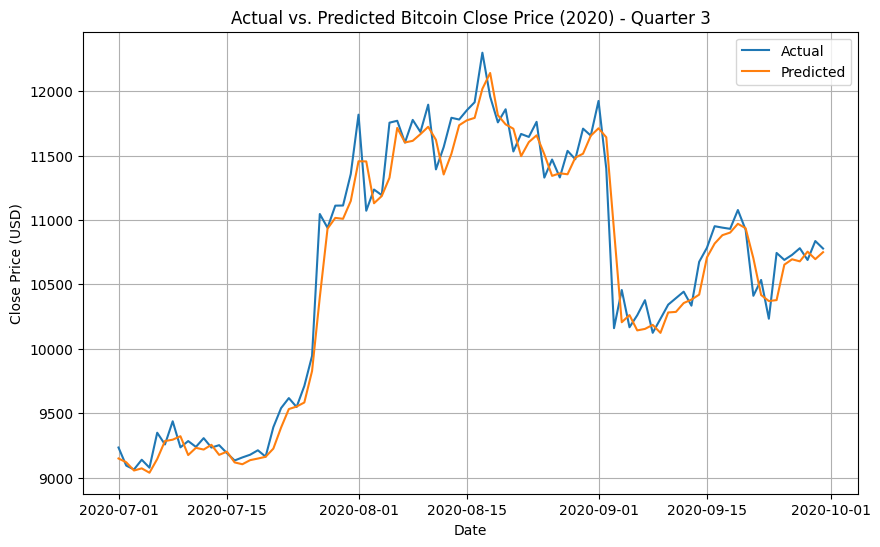

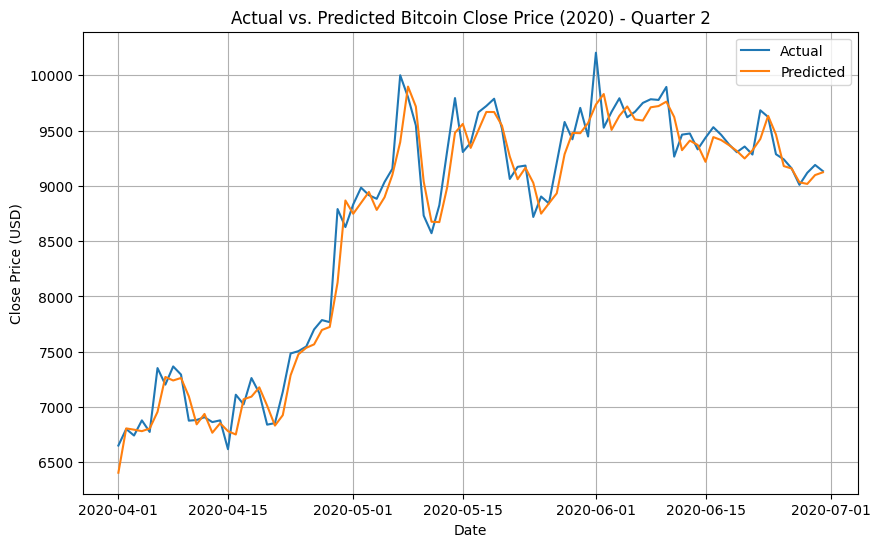

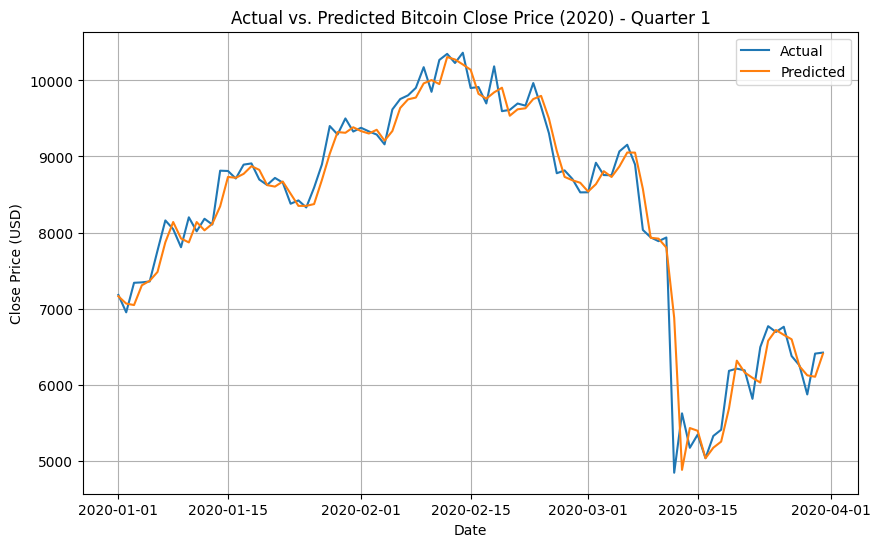

In [13]:
# Filter data for 2020
df_2020 = df[(df['date'] >= '2020-01-01') & (df['date'] <= '2020-12-31')]

# Create a new column for quarter
df_2020['quarter'] = df_2020['date'].dt.quarter

# Prepare X and y for prediction
X_2020 = df_2020[["open", "high", "low"]]
y_2020 = df_2020["close"]

# Make predictions for 2020
y_pred_2020 = predict(X_2020, w, b)

# Plot actual vs. predicted close prices for each quarter
for quarter in df_2020['quarter'].unique():
	df_quarter = df_2020[df_2020['quarter'] == quarter]
	plt.figure(figsize = (10, 6))
	plt.plot(df_quarter['date'], df_quarter['close'], label = 'Actual')
	plt.plot(df_quarter['date'], y_pred_2020[df_2020['quarter'] == quarter], label = 'Predicted')
	plt.title(f'Actual vs. Predicted Bitcoin Close Price (2020) - Quarter {quarter}')
	plt.xlabel('Date')
	plt.ylabel('Close Price (USD)')
	plt.legend()
	plt.grid(True)
	plt.show()


In [14]:
from sklearn.metrics import r2_score

# Calculate R-squared on the 2019 Q1 data
r_squared_2019_Q1 = r2_score(y_2019_Q1_actual, y_2019_Q1_pred)

print("R-squared for 2019 Q1:", round(r_squared_2019_Q1, 4))


R-squared for 2019 Q1: 0.9183
